# Initiation

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pip
import seaborn as sns

%pip install transformers
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\97109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\97109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Import Training Data

## Data from the original contest

In [3]:
df_train = pd.read_csv("train.csv")
df_train.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

Drop url, licese, and the training results

In [4]:
# URL and license are mostly empty we can intuitively know they won't have any siginificance
# We want to focus on the texts only

df_train = df_train.drop(['url_legal', 'license'], axis=1)
df_train.head()

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845


## Dataset from CLEAR

In [5]:
# Read
CLEAR_df = pd.read_csv('CLEAR.csv')
CLEAR_df.columns

Index(['ID', 'Last Changed', 'Author', 'Title', 'Anthology', 'URL', 'Source',
       'Pub Year', 'Category', 'Location', 'License', 'MPAA\nMax',
       'MPAA \n#Max', 'MPAA\n#Avg', 'Excerpt', 'Google\nWC', 'Joon\nWC v1',
       'British WC', 'British Words', 'Sentence\nCount v1',
       'Sentence\nCount v2', 'Paragraphs', 'BT Easiness', 'BT s.e.',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred',
       'Kaggle split'],
      dtype='object')

In [6]:
# Drop columns and store the result columns seperately
CLEAR_df = CLEAR_df.rename(columns={'ID': 'id', 'Excerpt': 'excerpt', 'BT Easiness': 'target', 'BT s.e.': 'standard_error'})
CLEAR_df.tail()

,id,Last Changed,Author,Title,Anthology,URL,Source,Pub Year,Category,Location,...,CAREC_M,CARES,CML2RI,firstPlace_pred,secondPlace_pred,thirdPlace_pred,fourthPlace_pred,fifthPlace_pred,sixthPlace_pred,Kaggle split
4721,8029.0,NaN,wikijunior,Bugs/Black Widow,Wikijunior\n,https://en.wikibooks.org/wiki/Wikijunior:Bugs/...,wikibooks,2020.0,Info,start,...,0.08300,0.486970,22.731214,0.162251,0.106933,-0.044770,0.016760,-0.043617,-0.079214,Test
4722,8030.0,NaN,wikijunior,Solids,Wikijunior\n,https://en.wikibooks.org/wiki/Geometry_for_Ele...,wikibooks,2014.0,Info,start,...,0.19583,0.381914,16.386932,-0.680378,-0.451011,-0.446233,-0.335672,-0.487118,-0.422290,Train
4723,8031.0,NaN,wikijunior,Anials,Wikijunior\n,https://en.wikibooks.org/wiki/Wikijunior:Biolo...,wikibooks,2018.0,Info,start,...,0.20880,0.495853,14.830202,0.357267,0.330677,0.230611,0.289018,0.382340,0.214723,Train
4724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extract the ids and texts

In [7]:
CLEAR_df = CLEAR_df[['id', 'excerpt', 'target', 'standard_error']]
CLEAR_df.head()

,id,excerpt,target,standard_error
0,400.0,When the young people returned to the ballroom...,-0.340259,0.464009
1,401.0,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,402.0,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,403.0,Mr. Grimes was to come up next morning to Sir ...,-1.785965,0.526599
4,404.0,And outside before the palace a great garden w...,-1.054013,0.450007


# Concactenate datasets

## Merge datasets

In [8]:
concat_df_list = [df_train, CLEAR_df]

# Concatenate along rows and reset index
consolidated_df = pd.concat(concat_df_list, axis=0, ignore_index=True)

# Convert the 'id' column to string
consolidated_df['id'] = consolidated_df['id'].astype(str)

# Drop none types
consolidated_df = consolidated_df.dropna()
consolidated_df.isna().sum()

id                0
excerpt           0
target            0
standard_error    0
dtype: int64

In [9]:
# Drop duplicates
consolidated_df = consolidated_df.drop_duplicates()
consolidated_df.duplicated().sum()

np.int64(0)

In [10]:
consolidated_df.tail()

,id,excerpt,target,standard_error
7553,8027.0,The name Monarch means “king”. An adult Monarc...,0.423388,0.511439
7554,8028.0,"Walking Sticks are long, thin, and slow-moving...",-0.614142,0.475506
7555,8029.0,A Black Widow is a shiny black spider. It has ...,0.310336,0.508939
7556,8030.0,Solids are shapes that you can actually touch....,-0.215279,0.514128
7557,8031.0,Animals are made of many cells. They eat thing...,0.300779,0.512379


Save results

In [11]:
consolidated_df_results = consolidated_df[['target', 'standard_error']].copy()
consolidated_df_results.tail()

,target,standard_error
7553,0.423388,0.511439
7554,-0.614142,0.475506
7555,0.310336,0.508939
7556,-0.215279,0.514128
7557,0.300779,0.512379


Drop results columns

In [12]:
consolidated_df = consolidated_df.drop(['target', 'standard_error'], axis = 1)
consolidated_df.tail()

,id,excerpt
7553,8027.0,The name Monarch means “king”. An adult Monarc...
7554,8028.0,"Walking Sticks are long, thin, and slow-moving..."
7555,8029.0,A Black Widow is a shiny black spider. It has ...
7556,8030.0,Solids are shapes that you can actually touch....
7557,8031.0,Animals are made of many cells. They eat thing...


# General analysis of the data

In [13]:
text_length = consolidated_df['excerpt'].apply(lambda x: len(x.split(' ')))
print(f'--- Distribution of the Total Data Text Length ---\n')
print(text_length.describe())

--- Distribution of the Total Data Text Length ---

count    7558.000000
mean      171.840963
std        16.992603
min       125.000000
25%       158.000000
50%       173.000000
75%       186.000000
max       205.000000
Name: excerpt, dtype: float64


Plot of the distribution

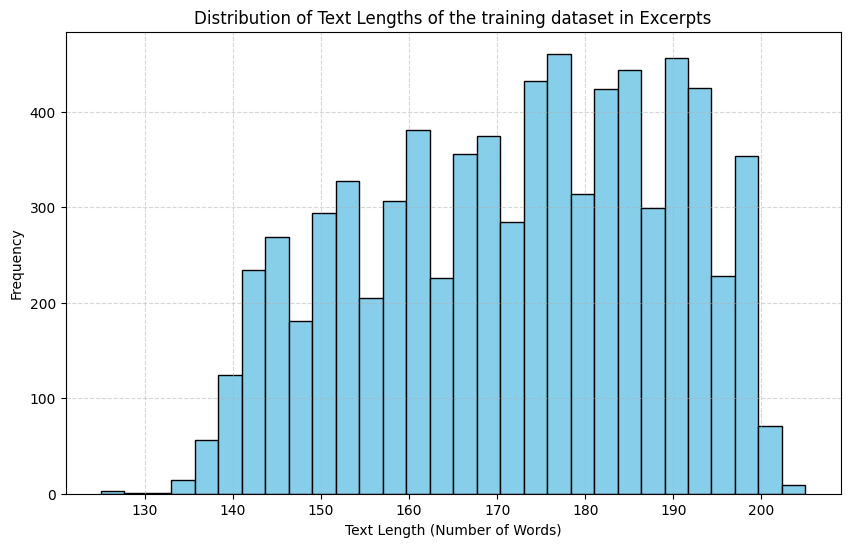

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths of the training dataset in Excerpts')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Since the target datasets have a similar distribution and are both calculated using Bradley–Terry ease of readability score, we can directly concactenate them together.

# Import Testing Data

In [15]:
df_test = pd.read_csv("test.csv")
df_test.columns

Index(['id', 'url_legal', 'license', 'excerpt'], dtype='object')

Drop url and license columns

In [16]:
# Same as for the training dataset drop the insignificant columns

df_test = df_test.drop(['url_legal', 'license'], axis = 1)
df_test.head()

,id,excerpt
0,c0f722661,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,It was a bright and cheerful scene that greete...
3,04caf4e0c,Cell division is the process by which a parent...
4,0e63f8bea,Debugging is the process of finding and resolv...


Analysis and plot of the data

In [17]:
text_length_test = df_test['excerpt'].apply(lambda x: len(x.split(' ')))
print(f'--- Distribution of the Total Data Text Length ---\n')
print(text_length_test.describe())

--- Distribution of the Total Data Text Length ---

count      7.000000
mean     164.142857
std       13.094892
min      147.000000
25%      154.500000
50%      167.000000
75%      173.500000
max      179.000000
Name: excerpt, dtype: float64


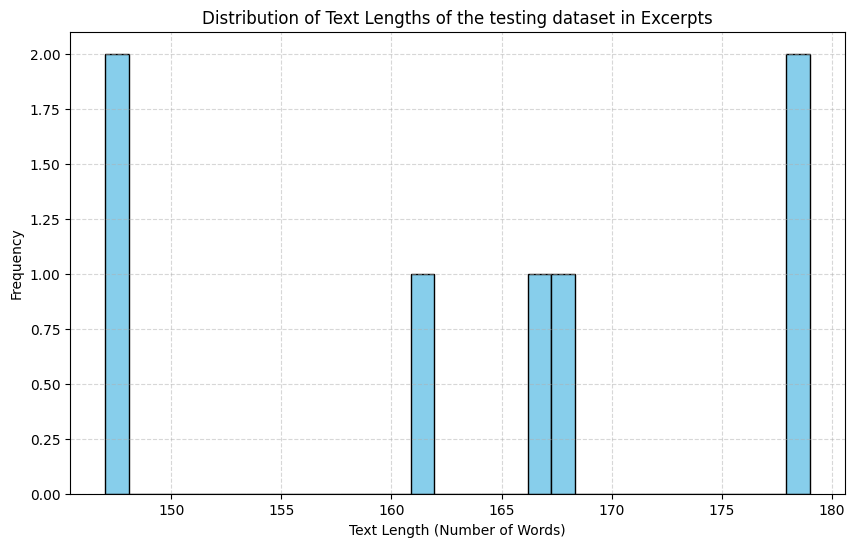

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(text_length_test, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths of the testing dataset in Excerpts')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Data Preprocessing

In [19]:
# Text cleaning: Remove all puncuations and special characters
import re

def clean_for_reading_difficulty(text):
    if isinstance(text, str):
        # Keep basic punctuation: . , ? ! ' "
        text = re.sub(r'[^A-Za-z0-9\s\.\,\?\!\'\"]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    return text

for col in consolidated_df.select_dtypes(include=['object', 'string']).columns:
    consolidated_df[col] = consolidated_df[col].apply(clean_for_reading_difficulty)
# Show one random cleaned excerpt
print(consolidated_df['excerpt'].sample(1).values[0])


When the brain detects stress in the environment, the stressresponse system goes into action. This begins with the hypothalamuspituitaryadrenal HPA axis. Those are some very long words, so scientists just call it the HPA axis. When the brain detects stress, it first sends a message to a part of the brain called the hypothalamus. The job of the hypothalamus is to wake up the pituitary gland. Although the pituitary is only about the size of a small pea, it has a mighty job. The pituitary releases hormones, which are the messengers in the stressresponse system. These hormones travel out of the brain to the adrenal glands. The adrenal glands sit on top of the kidneys. The adrenal glands release cortisol into the body. Cortisol is known as the stress hormone. Cortisol is a messenger that sets other organs in the body into action. It is like the superpower of the stress response system. Cortisol helps the brain to think clearly, sends energy to important muscles, and increases heart rate and

## Text tokenization

In [20]:
from transformers import AutoTokenizer

# Load a tokenizer — you can change the model to others like "roberta-base"
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the entire 'excerpt' column
tokenized = tokenizer(
    consolidated_df["excerpt"].tolist(),     # Convert to list of strings
    padding=True,                            # Pad to longest sequence
    truncation=True,                         # Truncate if too long
    return_tensors="pt",                     # Return PyTorch tensors
    return_attention_mask=True               # Include attention mask
)

print(tokenized)


{'input_ids': tensor([[  101,  2043,  1996,  ...,     0,     0,     0],
        [  101,  2035,  2083,  ...,     0,     0,     0],
        [  101,  2004,  5074,  ...,     0,     0,     0],
        ...,
        [  101,  1037,  2304,  ...,     0,     0,     0],
        [  101, 26778,  2024,  ...,     0,     0,     0],
        [  101,  4176,  2024,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [21]:
# Get token information
# consolidated_df["token_count"] = [len(x) for x in tokenized['input_ids']]
# consolidated_df["avg_token_length"] = consolidated_df["excerpt"].apply(lambda x: sum(len(w) for w in x.split()) / len(x.split()))

# consolidated_df.tail()

Here I moved the feature engineering to GPU

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

C:\Users\97109\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
# Load tokenizer and model, move model to GPU
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased").to(device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [24]:
# Extract texts and ids from the DataFrame
texts = consolidated_df["excerpt"].tolist()
ids = consolidated_df["id"].tolist()

# Custom Dataset to include IDs
class TextDataset(Dataset):
    def __init__(self, texts, ids, tokenizer, max_length=512):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.ids = ids

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["id"] = self.ids[idx]
        return item

    def __len__(self):
        return len(self.ids)

# Create dataset and dataloader
dataset = TextDataset(texts, ids, tokenizer)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

# Storage for embeddings and IDs
all_embeddings = []
all_ids = []

with torch.no_grad():
    for batch in dataloader:
        batch_ids = batch.pop("id")  # remove 'id' before passing to model
        batch = {k: v.to(device) for k, v in batch.items()}
        
        outputs = model(**batch)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # shape: (batch_size, hidden_size)
        
        all_embeddings.append(cls_embeddings.cpu())
        all_ids.extend(batch_ids)

# Concatenate all embeddings
all_embeddings_tensor = torch.cat(all_embeddings, dim=0)

# (Optional) Convert to DataFrame for further processing or saving
embeddings_df = pd.DataFrame(all_embeddings_tensor.numpy())
embeddings_df["id"] = all_ids

In [25]:
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,id
0,-0.420356,0.076422,-0.080025,0.207073,-0.410900,-0.233757,0.124144,0.765684,-0.070045,-0.523037,...,-0.116186,0.117236,-0.563000,0.072653,0.383698,-0.278512,0.159379,0.474416,0.621607,c12129c31
1,-0.459441,0.020078,-0.358931,-0.458465,-0.140263,-0.443445,0.210513,0.468700,-0.461738,0.018436,...,0.010837,0.071377,-0.278813,0.079575,-0.398410,-0.115920,0.405523,0.442824,0.627373,85aa80a4c
2,0.051614,-0.294982,-0.173578,0.007815,0.498505,0.078433,0.382244,0.152549,-0.420905,-0.131866,...,-0.183703,-0.071367,-0.234543,0.656925,-0.073248,-0.499888,0.188432,0.569083,0.504918,b69ac6792
3,-0.070482,-0.213584,-0.271137,-0.521914,-0.721200,0.550531,-0.054899,0.784124,-0.744993,-0.522974,...,-0.196607,-0.437422,0.108851,0.391316,0.497783,-0.032082,0.198458,0.509247,-0.001240,dd1000b26
4,-0.614775,0.514592,-0.064365,-0.136607,-0.836975,0.410106,1.055029,1.565177,-1.222834,-0.266328,...,-0.621650,-0.331180,-0.733666,0.182073,0.645754,-0.225773,-0.521571,0.913736,0.200539,37c1b32fb


# Model Trials

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assume 'target' is the column we're trying to predict
y = consolidated_df_results['target']
X = embeddings_df.drop(columns=['id'])  # Drop the 'id' column, keep only numeric features

# Split into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
# Predict and calculate RMSE
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(rmse)
# Print the RMSE
print(f"Random Forest RMSE on validation set: {rmse:.4f}")

Random Forest RMSE on validation set: 0.4362
